#**1D SS Heat Transfer** 
Consider a plane wall (1-dimensional system with large surface area) of thickness $2 a$ and thermal conductivity $k$ with internal heat generation $\dot{q}$. The temperature on either surface is fixed: $T(a) = T_a$ and $T(-a) = T_a$.

#Schematic:

In [1]:
#@title
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://drive.google.com/uc?export=view&id=1gFtwBQcuBy2HEql_LHviZjnUdGKeCAiJ")

# Assumptions:
1.  1D (Cartesian)
2.  Steady State
3.  Constant $\dot{q}$
4.  Constant $k$

# Analysis:

Let's start by simplifying the heat diffusion equation: $$\frac{\partial}{\partial x} \left(k \frac{\partial T}{\partial x} \right) + \frac{\partial}{\partial y} \left(k \frac{\partial T}{\partial y} \right) + \frac{\partial}{\partial z} \left(k \frac{\partial T}{\partial z} \right) + \dot{q} = \rho c_p \frac{\partial T}{\partial t}.$$

Assuming 1D in the x-direction, the y and z derivatives go to zero. Assuming steady state, the temporal derivative goes to 0. Assuming $k$ is constant, we can pull the $k$ out of the derivative. This yeilds an ordinary differntial equation: $$k \frac{d^2 T}{dx^2} = -\dot{q}.$$

Although we can easily solve this by hand, let's use Python's symbolic math to help us.

First we import the required modules.


In [2]:
# Set up the python script
# import required modules

#Numerical Math
import math # math functions
import numpy as np # numerical math
from numpy import *

# Widgets
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

#Symbolic math
import sympy # symbolic math
from sympy import *
from sympy.abc import x

#plotting
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
import matplotlib.pyplot as plt
plt.rcParams.update(params)



Now we define the temperature as a function and various constants as symbols. We define the differential equation in terms of solving such that (stuff) =  0:  $$ \underbrace{\frac{d^2 T}{dx^2} + \frac{\dot{q}}{k}}_{\text{Use this in defining ODE}} = 0 .$$

The function dsolve lets us solve the ODE:

In [3]:
T = symbols('T', cls=Function)    # define T as a function
q, k, x, a, Ta = symbols('q k x a Ta')   # define these as symbols
eq = T(x).diff(x,x) + q/k         # define the ODE as the stuff in (stuff) = 0
Teq=dsolve(eq)                        # symbolically solve the ode
pprint(Teq)

              ⎛       q⋅x⎞
            x⋅⎜C₂⋅k - ───⎟
              ⎝        2 ⎠
T(x) = C₁ + ──────────────
                  k       


Note how the expression has a linear portion like wihtout heat generation and the parabolic portion due to heat generation.

There are two constants of integration that we need to fine from the boundary conditions. Rearrange each boundary condition into the form (stuff) = 0:

$$T(a) = T_a \rightarrow \underbrace{T(a) - T_a}_{\text{used in the def of the BC}} = 0$$
$$T(-a) = T_a \rightarrow \underbrace{T(-a)-  T_a}_{\text{used in the def of the BC}} = 0$$.

We have 2 equations and two unknowns. We can use the symbolic solver in python to find the constants.

In [4]:
C1, C2 = symbols('C1 C2')     # define these as symbols
constants = sympy.solve([Teq.rhs.subs(x,a)-Ta, Teq.rhs.subs(x,-a)-Ta],[C1,C2])  #Solve for C1 and C2
pprint(constants)

⎧          2         ⎫
⎪         a ⋅q       ⎪
⎨C₁: Ta + ────, C₂: 0⎬
⎪         2⋅k        ⎪
⎩                    ⎭


we now subsitute these into the temperature euqation to find an expression for $T(x)$

In [5]:
Teq = Teq.subs(constants)  # Substitute constants C1 and C2 into the equation
pprint(Teq)

             2        2
            a ⋅q   q⋅x 
T(x) = Ta + ──── - ────
            2⋅k    2⋅k 


Now let's plot this for one set of $a$, $\dot{q}$, $k$, and $T_a$. 

For constants that are a single value like $k$, you can use the subs command to replace. To input a set of positions, you need to "lambdify" the equation, then can input that into the epression for T.

Text(0, 0.5, 'T')

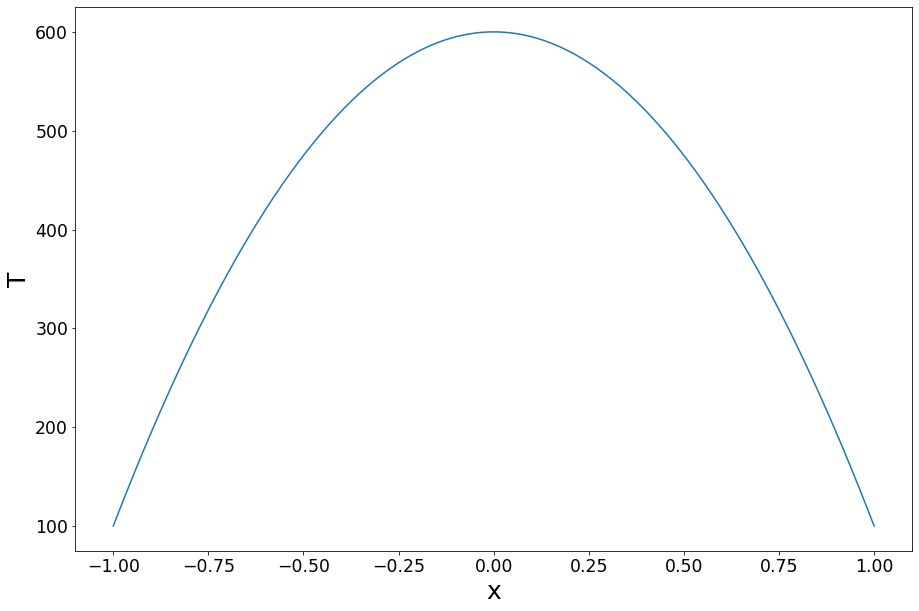

In [6]:
Ta_s = 100  #(^oC) boundary condition temperature
a_s = 1     #(m) Half width of system
q_s = 1000  #(W/m^3) heat generation rate
k_s = 1     #(W/m-K) thermal conductivity
Tp = Teq.rhs.subs([(a,a_s),(q,q_s),(k,k_s),(Ta,Ta_s)])  # Substitute givens into the equation
Tp = lambdify(x,Tp,"numpy")
xp = np.linspace(-a_s,a_s,num=100)
Tp = Tp(xp)
plt.figure(figsize=(15,10))
plt.plot(xp,Tp)
plt.xlabel('x',fontsize=25)
plt.ylabel('T',fontsize=25)


Now let's plot this for varying $a$, $\dot{q}$, $k$, and $T_a$. Explore how changing these parameters impact the curves

In [7]:
#@title
#Create ranges for interactive sliders. 
Ta_s =widgets.FloatSlider(value = 0, min = 0, max = 1000, step = 1, description = 'T(a) = T(-a):') 
a_s = widgets.FloatSlider(value = 1, min = 0.1, max = 10, step = .1, description = 'a (m):')
q_s = widgets.FloatSlider(value = 10**3, min = 0, max = 10**4, step = 10, description = 'q (W/m^3):')
k_s = widgets.FloatSlider(value = 1, min = 0.5, max = 1000, step = .5, description = 'k (W/m-k):')
Teq=dsolve(eq)

@interact
def plot_T(a1 = a_s, q1 = q_s, k1 = k_s, Ta1= Ta_s):
  constants = sympy.solve([Teq.rhs.subs(x,a)-Ta1, Teq.rhs.subs(x,-a)-Ta1],[C1,C2])  #Solve for C1 and C2
  Tp = Teq.subs(constants)  # Substitute constants C1 and C2 into the equation
  Tp = Tp.rhs.subs([(a,a1),(q,q1),(k,k1)])  # Substitute givens into the equation
  Tp = lambdify(x,Tp,"numpy")
  xp = np.linspace(-a1,a1,num=100)
  Tp = Tp(xp)
  plt.figure(figsize=(15,10))
  plt.plot(xp,Tp)
  plt.xlabel('x',fontsize=25)
  plt.ylabel('T',fontsize=25)


interactive(children=(FloatSlider(value=1.0, description='a (m):', max=10.0, min=0.1), FloatSlider(value=1000.…

What if the left and right sides have differnt temperautres. Here, we assign:

$$T(a) = T_a \rightarrow \underbrace{T(a) - T_a}_{\text{used in the def of the BC}} = 0$$
$$T(-a) = T_b \rightarrow \underbrace{T(-a)-  T_b}_{\text{used in the def of the BC}} = 0$$.


In [8]:
Tpa_s = widgets.FloatSlider(value = 0, min = 0, max = 1000, step = 10, description = 'T(a) (C):')
Tma_s = widgets.FloatSlider(value = 100, min = 0, max = 1000, step = 10, description = 'T(-a) (C):')
Teq=dsolve(eq)    # symbolically solve the ode

@interact
def plot_T(a1 = a_s, q1 = q_s, k1 = k_s, Tma = Tma_s, Tpa = Tpa_s):
  constants = sympy.solve([Teq.rhs.subs(x,a)-Tpa, Teq.rhs.subs(x,-a)-Tma],[C1,C2])  #Solve for C1 and C2
  Tp = Teq.subs(constants)  # Substitute constants C1 and C2 into the equation
  Tp = Tp.rhs.subs([(a,a1),(q,q1),(k,k1)])  # Substitute givens into the equation
  Tp = lambdify(x,Tp,"numpy")
  xp = np.linspace(-a1,a1,num=100)
  Tp = Tp(xp)
  plt.figure(figsize=(15,10))
  plt.plot(xp,Tp)
  plt.xlabel('x',fontsize=25)
  plt.ylabel('T',fontsize=25)


interactive(children=(FloatSlider(value=1.0, description='a (m):', max=10.0, min=0.1), FloatSlider(value=1000.…

# Activities
Make a copy for yourself and explore the system.
*   When you shift $T(x=-a)$ and $T(x=a)$ boundary conditions, how does the amount of heat flowing to each boundary change? Hint, pay attention to the magnitude of $\frac{dT}{dx}$ at the interfaces. Also, if you look at the position where $\frac{dT}{dx} = 0$, that point has $q''=0$. Thus all heat generated to the left of that point flows out of the left boundary and all the heat generated in the region to the right flows out the right boundary. You can add a few lines of code to calculate these things.
*  Change the ODE to the one for radial or sperical coordinates. 
*  Change the expressions for boundary conditions to account for convection to a free stream temperature $T_\infty$ or make one boundary adiabatic.